<a href="https://colab.research.google.com/github/BetoRdz01/Extraccion-de-caracteristicas/blob/main/Act4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 4: Extracción de Características**
Alberto Rodríguez Porras | A01721497

In [85]:
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling import freq_tbl

In [87]:
df= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [88]:
#Seleccionamos 20 columnas
df2 = df.iloc[:,[1,3,10,11,12,13,14,15,16,21,22,23,24,26,27,31,34,36,47,48]]
df2.head()

,_title,_updated_by,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,268_number_fridges,184_store_devices,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,5_change_store_space_last_year,6_change_employees_average_salary_last_year,49_inventory_records,18_sales_records,145_number_direct_competitors,186_internet_connection,189_payment_methods,214_customer_relationship_tools,33_credit_to_customers
0,"November 12, 2022",Salomon Abdala Perez,yes,no,no,2,0.0,POS system (i.e. computer + bar code scanner +...,4,2.0,2.0,No cambió,No cambió,Software especializado + computadora,Software especializado + computadora,3.0,yes,"Efectivo,Transferencia interbancaria",Redes sociales,no
1,"November 12, 2022",Salomon Abdala Perez,no,yes,yes,0,4.0,Dataphone (i.e. card payments),8,1.0,1.0,Aumentó 15%,No cambió,No lo hago,No lo hago,4.0,yes,"Efectivo,Transferencia interbancaria",Aplicación móvil,no
2,"November 12, 2022",Salomon Abdala Perez,yes,no,no,0,0.0,"Dataphone (i.e. card payments),POS system (i.e...",24,2.0,2.0,No cambió,No cambió,En Excel,Software especializado + computadora,0.0,yes,"Efectivo,Tarjeta de débito y/o crédito",Redes sociales,yes
3,"November 12, 2022",Salomon Abdala Perez,no,no,no,0,0.0,POS system (i.e. computer + bar code scanner +...,2,1.0,1.0,No cambió,No cambió,Software especializado + computadora,Software especializado + computadora,4.0,yes,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,no
4,"November 12, 2022",Salomon Abdala Perez,yes,no,no,0,0.0,Smartphone,16,0.0,0.0,No cambió,No cambió,En papel,En papel,0.0,yes,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,yes


In [90]:
#Datos numéricos
df2n = df2.iloc[:,[5,6,8,9,10,15]]

#Datos objetos
df2o= df2.iloc[:,[0,1,2,3,4,7,11,12,13,14,16,17,18,19]]

**Nulos**

In [91]:
df2n.isnull().sum()

97_number_of_customers_in_store                       0
268_number_fridges                                    3
104_how_many_shelves_does_the_micro_retailer_have     0
2_current_permanent_employees                        60
4_number_permanent_employees_last_year               76
145_number_direct_competitors                        68
dtype: int64

In [92]:
#Sustituímos nulos con mediana de columna
df2n=df2n.fillna(round(df2n.median(),1))
df2n.isnull().sum()

97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
145_number_direct_competitors                        0
dtype: int64

In [93]:
#Sustituímos nulos con 'No hay registros'
df2o=df2o.fillna('No hay registros')
df2o.isnull().sum()

_title                                                   0
_updated_by                                              0
108_does_the_micro_retailer_has_a_barred_window_         0
99_does_the_micro_retailer_exhibits_products_outside_    0
102_does_the_micro_retailer_sells_fresh_products_        0
184_store_devices                                        0
5_change_store_space_last_year                           0
6_change_employees_average_salary_last_year              0
49_inventory_records                                     0
18_sales_records                                         0
186_internet_connection                                  0
189_payment_methods                                      0
214_customer_relationship_tools                          0
33_credit_to_customers                                   0
dtype: int64

**Outliers**

In [95]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df2n
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25
Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
outliers_iqr= df2n[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
#Obtenemos datos limpios del Dataframe
df2n_iqr= df2n[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df2n_iqr.isnull().sum()

97_number_of_customers_in_store                       5
268_number_fridges                                   10
104_how_many_shelves_does_the_micro_retailer_have     9
2_current_permanent_employees                        15
4_number_permanent_employees_last_year               74
145_number_direct_competitors                        21
dtype: int64

In [96]:
#Reemplazamos valores nulos (atípicos) con la mediana
df2n_iqr2=df2n_iqr.copy()
df2n_iqr2=df2n_iqr2.fillna(round(df2n_iqr.median(),1))
df2n_iqr2.isnull().sum()

97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
145_number_direct_competitors                        0
dtype: int64

In [97]:
df = pd.concat([df2o, df2n], axis=1)
df.head()

,_title,_updated_by,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,5_change_store_space_last_year,6_change_employees_average_salary_last_year,49_inventory_records,18_sales_records,186_internet_connection,189_payment_methods,214_customer_relationship_tools,33_credit_to_customers,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors
0,"November 12, 2022",Salomon Abdala Perez,yes,no,no,POS system (i.e. computer + bar code scanner +...,No cambió,No cambió,Software especializado + computadora,Software especializado + computadora,yes,"Efectivo,Transferencia interbancaria",Redes sociales,no,2,0.0,4,2.0,2.0,3.0
1,"November 12, 2022",Salomon Abdala Perez,no,yes,yes,Dataphone (i.e. card payments),Aumentó 15%,No cambió,No lo hago,No lo hago,yes,"Efectivo,Transferencia interbancaria",Aplicación móvil,no,0,4.0,8,1.0,1.0,4.0
2,"November 12, 2022",Salomon Abdala Perez,yes,no,no,"Dataphone (i.e. card payments),POS system (i.e...",No cambió,No cambió,En Excel,Software especializado + computadora,yes,"Efectivo,Tarjeta de débito y/o crédito",Redes sociales,yes,0,0.0,24,2.0,2.0,0.0
3,"November 12, 2022",Salomon Abdala Perez,no,no,no,POS system (i.e. computer + bar code scanner +...,No cambió,No cambió,Software especializado + computadora,Software especializado + computadora,yes,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,no,0,0.0,2,1.0,1.0,4.0
4,"November 12, 2022",Salomon Abdala Perez,yes,no,no,Smartphone,No cambió,No cambió,En papel,En papel,yes,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",No hay registros,yes,0,0.0,16,0.0,0.0,0.0


**Análisis Univariado**

In [98]:
freq_tbl(df)

              _title  frequency  percentage  cumulative_perc
0   November 9, 2022         73    0.426901         0.426901
1  November 10, 2022         26    0.152047         0.578947
2   November 7, 2022         20    0.116959         0.695906
3   November 3, 2022         16    0.093567         0.789474
4  November 12, 2022         15    0.087719         0.877193
5   November 8, 2022         10    0.058480         0.935673
6   November 4, 2022          9    0.052632         0.988304
7  November 11, 2022          1    0.005848         0.994152
8   November 2, 2022          1    0.005848         1.000000

----------------------------------------------------------------

                          _updated_by  frequency  percentage  cumulative_perc
0                Salomon Abdala Perez         20    0.116959         0.116959
1   Ángel Francisco Altamirano Campos         16    0.093567         0.210526
2                         José Zapata         14    0.081871         0.292398
3          

In [99]:
table1= freq_tbl(df.iloc[:,0])
table1

,_title,frequency,percentage,cumulative_perc
0,"November 9, 2022",73,0.426901,0.426901
1,"November 10, 2022",26,0.152047,0.578947
2,"November 7, 2022",20,0.116959,0.695906
3,"November 3, 2022",16,0.093567,0.789474
4,"November 12, 2022",15,0.087719,0.877193
5,"November 8, 2022",10,0.058480,0.935673
6,"November 4, 2022",9,0.052632,0.988304
7,"November 11, 2022",1,0.005848,0.994152
8,"November 2, 2022",1,0.005848,1.000000


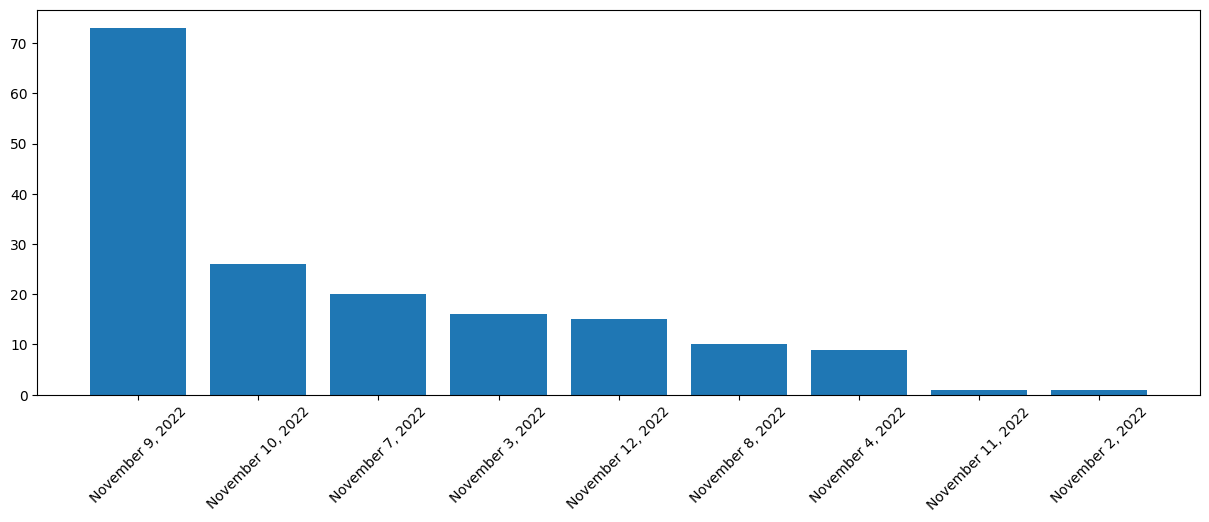

In [100]:
plt.figure(figsize=(15,5))
plt.bar(table1.iloc[:,0],table1.iloc[:,1])
plt.xticks(rotation=45)
plt.show()

Observamos que la mayor cantidad de registros fue el 9 de noviembre seguido por 10 de noviembre. El día con menos registros es el día 2 de noviembre. 

In [101]:
table2= freq_tbl(df.iloc[:,1])
table2

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


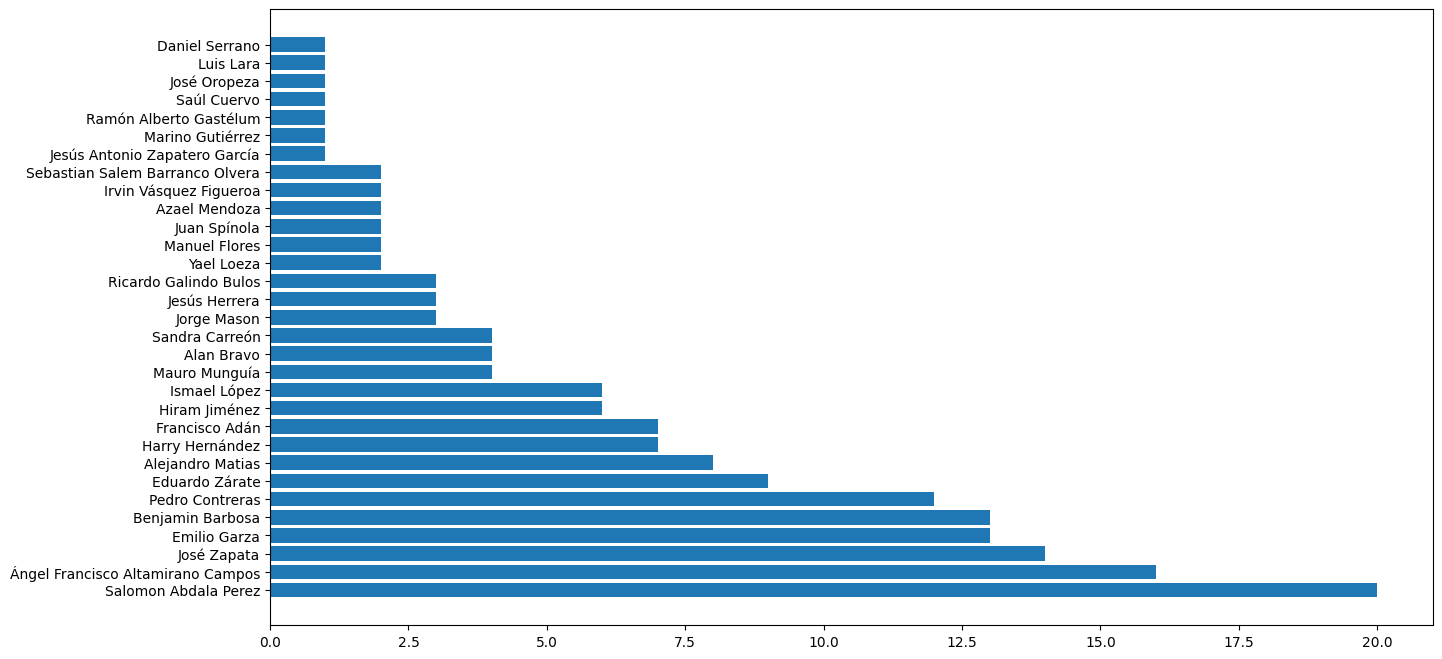

In [102]:
plt.figure(figsize=(15,8))
plt.barh(table2.iloc[:,0],table2.iloc[:,1])
plt.show()

Se observa que Salomon Abdala fue quien más contribuyó a las respuestas de la encuesta con un total de 20 encuestados. Seguido por Ángel, con más de 15 encuestados mientras que hubo gente con 1 sola encuesta. 

In [103]:
table3= freq_tbl(df.iloc[:,2])
table3

,108_does_the_micro_retailer_has_a_barred_window_,frequency,percentage,cumulative_perc
0,no,124,0.725146,0.725146
1,yes,47,0.274854,1.000000


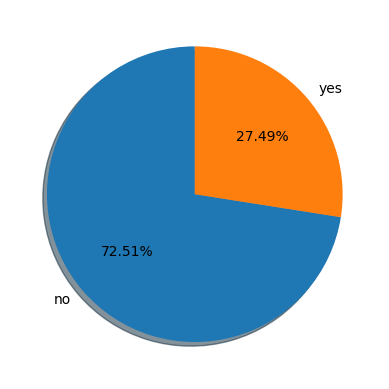

In [104]:
plt.pie(table3.iloc[:,1], labels=table3.iloc[:,0], startangle=90, shadow=True, autopct='%1.2f%%')
plt.show()

La gran mayoría de las tiendas no tienen ventanas con barreras. 

In [105]:
table4= freq_tbl(df.iloc[:,3])
table4

,99_does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


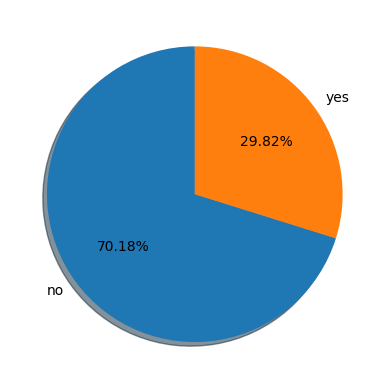

In [106]:
plt.pie(table4.iloc[:,1], labels=table4.iloc[:,0], startangle=90, shadow=True, autopct='%1.2f%%')
plt.show()

La mayoría de las tiendas no exhiben productos afuera de la tienda. 

In [107]:
table5= freq_tbl(df.iloc[:,4])
table5

,102_does_the_micro_retailer_sells_fresh_products_,frequency,percentage,cumulative_perc
0,no,105,0.614035,0.614035
1,yes,66,0.385965,1.000000


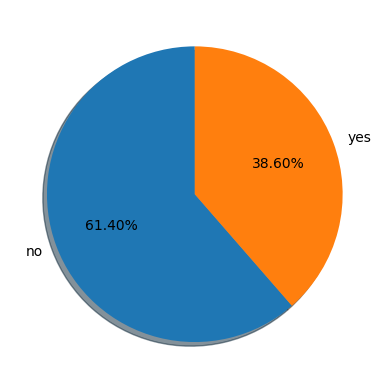

In [108]:
plt.pie(table5.iloc[:,1], labels=table5.iloc[:,0], startangle=90, shadow=True, autopct='%1.2f%%')
plt.show()

61% de las tiendas no venden productos frescos. 

In [109]:
table6= freq_tbl(df.iloc[:,5])
table6

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.672515
9,"Analog cash register,Security cameras",4,0.023392,0.695906


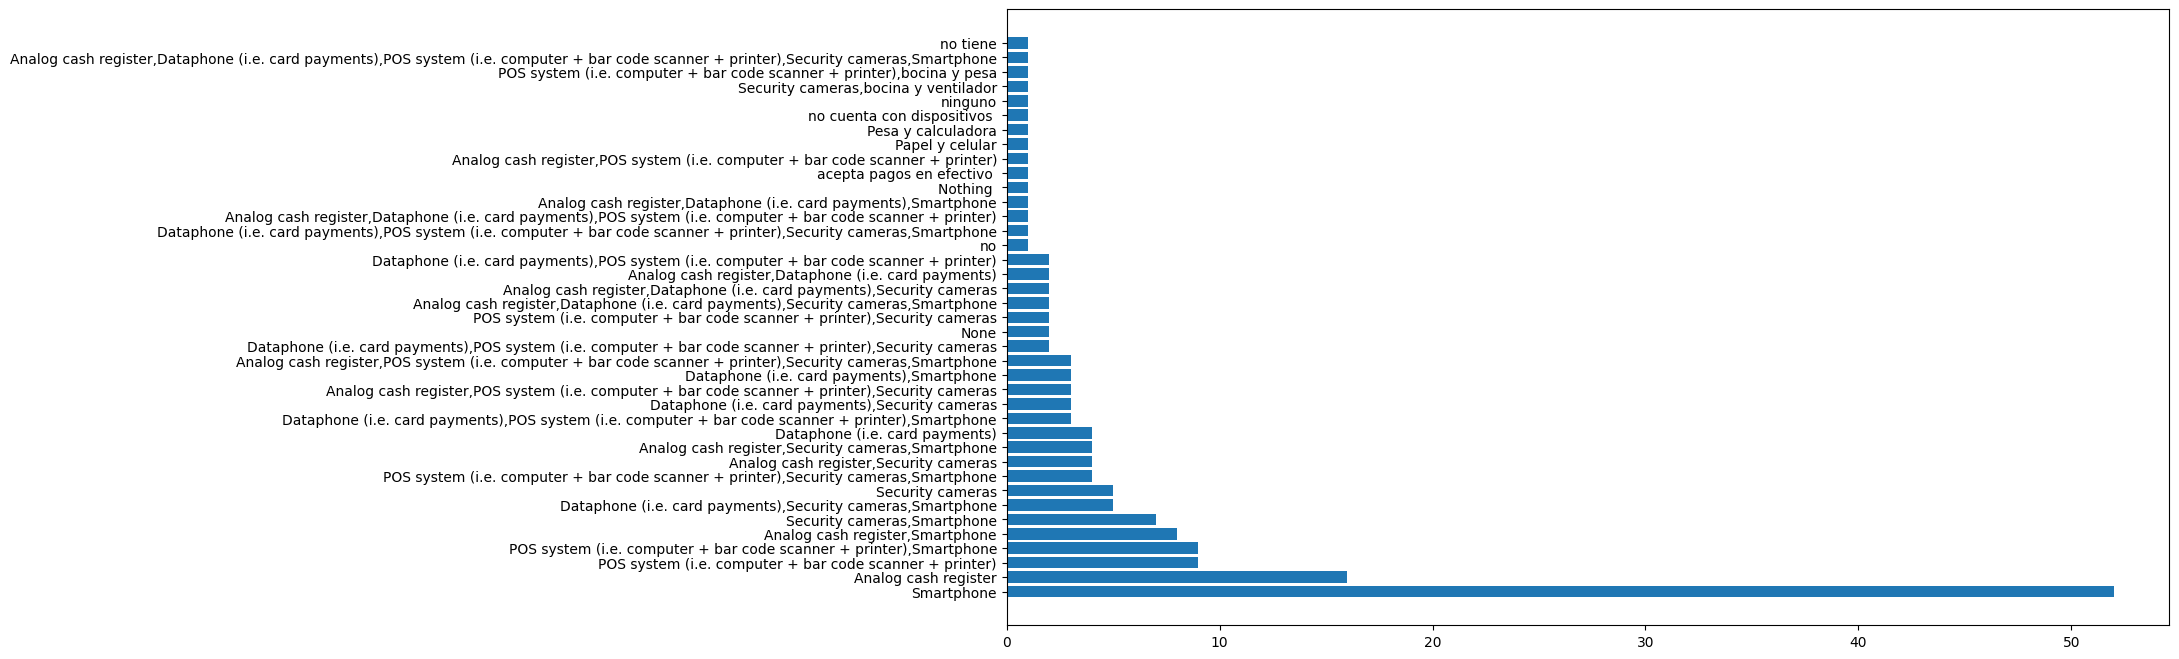

In [110]:
plt.figure(figsize=(15,8))
plt.barh(table6.iloc[:,0],table6.iloc[:,1])
plt.show()

Gran parte de las tiendas manejan únicamente smartphones. Las demás manejan otros dispositivos o combinaciones de dispositivos. Únicamente 1 tienda no cuenta con dispositivos. 

In [111]:
table7= freq_tbl(df.iloc[:,6])
table7

,5_change_store_space_last_year,frequency,percentage,cumulative_perc
0,No cambió,72,0.421053,0.421053
1,No hay registros,72,0.421053,0.842105
2,Disminuyó 15%,9,0.052632,0.894737
3,Aumentó 25%,7,0.040936,0.935673
4,Aumentó 15%,4,0.023392,0.959064
5,Aumentó 50% o más,4,0.023392,0.982456
6,Disminuyó 25%,2,0.011696,0.994152
7,Disminuyó 50% o más,1,0.005848,1.000000


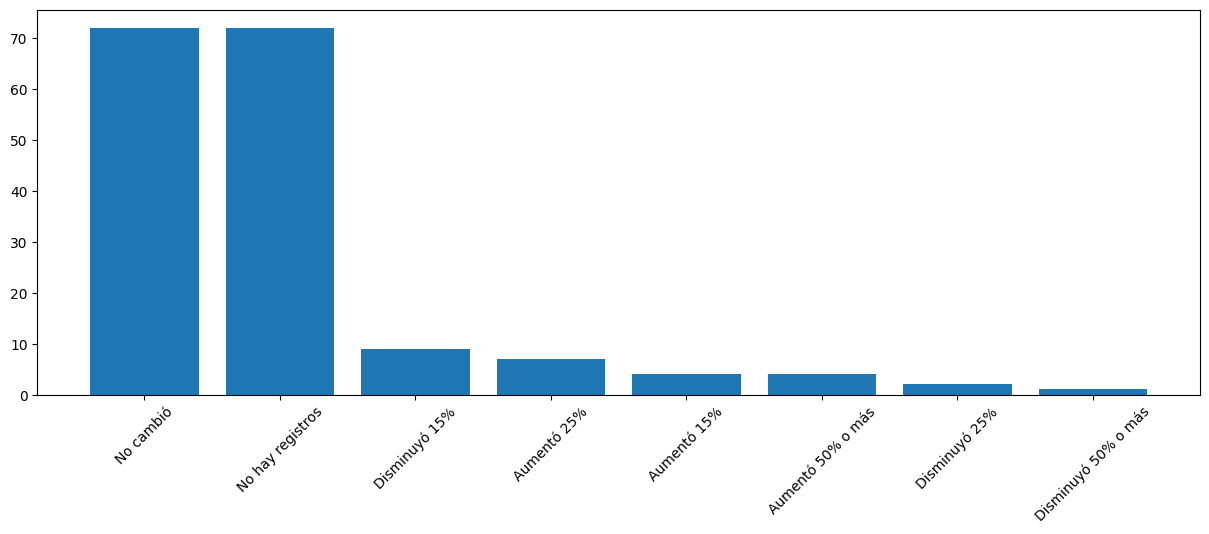

In [112]:
plt.figure(figsize=(15,5))
plt.bar(table7.iloc[:,0],table7.iloc[:,1])
plt.xticks(rotation=45)
plt.show()

La mayoría de las tiendas no cambiaron el espacio de la tienda. sin embargo la segunda categoría con mayor frecuencia expresa que disminuyó el espacio de la tienda en un 15%. 

In [113]:
table8= freq_tbl(df.iloc[:,7])
table8

,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,No hay registros,86,0.502924,0.502924
1,No cambió,50,0.292398,0.795322
2,Aumentó 15%,14,0.081871,0.877193
3,Disminuyó 15%,5,0.029240,0.906433
4,Aumentó 25%,4,0.023392,0.929825
5,Aumentó 50% o más,4,0.023392,0.953216
6,Disminuyó 25%,3,0.017544,0.970760
7,Dependiente,1,0.005848,0.976608
8,Disminuyó 50% o más,1,0.005848,0.982456
9,0,1,0.005848,0.988304


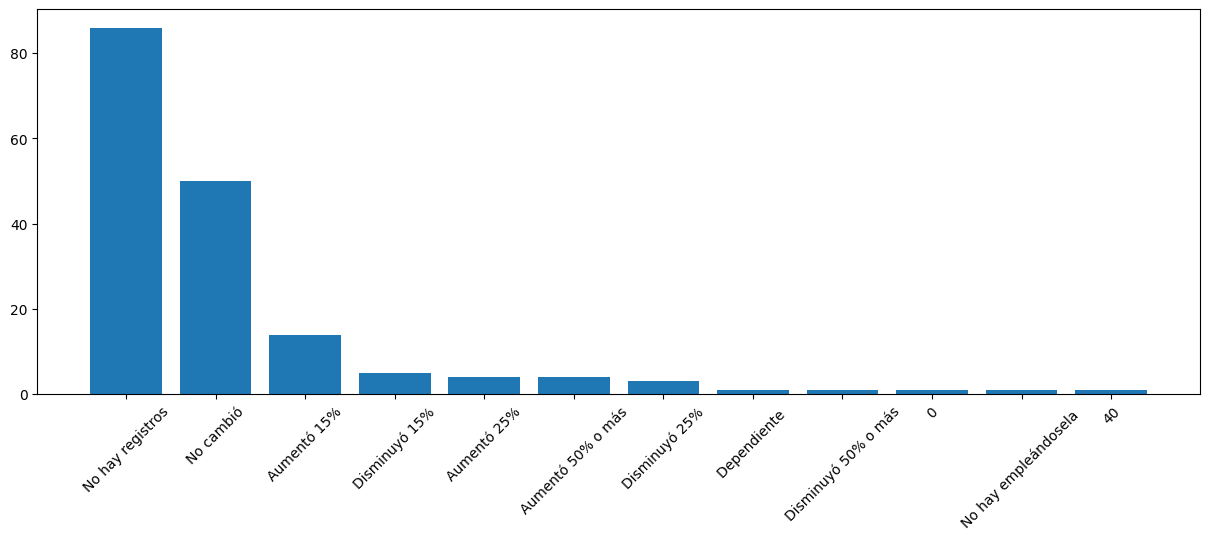

In [114]:
plt.figure(figsize=(15,5))
plt.bar(table8.iloc[:,0],table8.iloc[:,1])
plt.xticks(rotation=45)
plt.show()

De las tiendas, la gran mayoría no cambió el salario de los empleados, sin embargo la segunda categoría con mayor frecuencia menciona que el salario promedio subió un 15%. 

In [115]:
table9= freq_tbl(df.iloc[:,8])
table9

,49_inventory_records,frequency,percentage,cumulative_perc
0,No hay registros,61,0.356725,0.356725
1,En papel,40,0.233918,0.590643
2,Software especializado + computadora,21,0.122807,0.713450
3,En Excel,20,0.116959,0.830409
4,No lo hago,18,0.105263,0.935673
5,"En Excel,En papel",7,0.040936,0.976608
6,Mentalmente,1,0.005848,0.982456
7,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.988304
8,"En papel,Mental",1,0.005848,0.994152
9,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


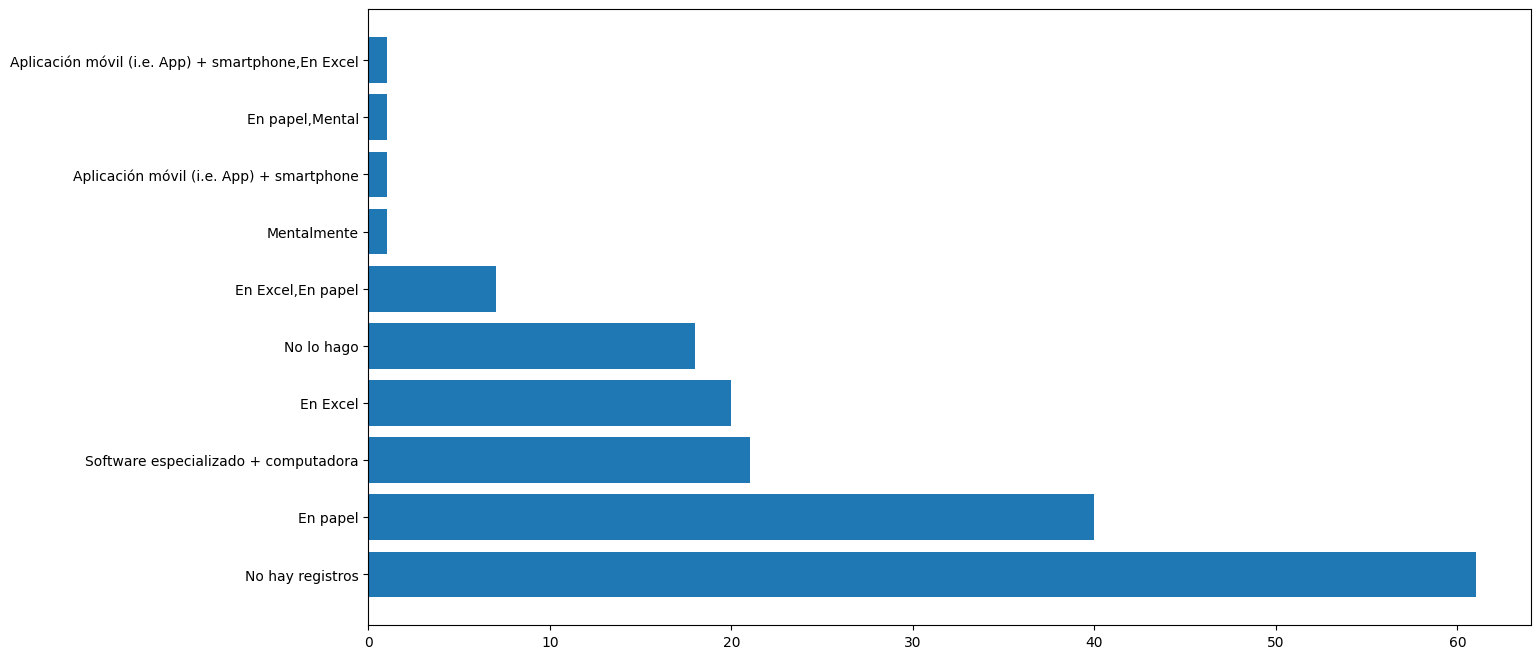

In [116]:
plt.figure(figsize=(15,8))
plt.barh(table9.iloc[:,0],table9.iloc[:,1])
plt.show()

Aunque la mayoría de los datos no se llenaron, observamos que 40 de las empresas manejan la información de su inventario en papel, y cerca de 21 empresas lo manejan en computadora con un software especializado. Y 20 lo manejan en excel. Por lo que se ve como las empresas poco a poco hacen esta transición de papel a digital. 

In [117]:
table10= freq_tbl(df.iloc[:,9])
Filtro= table10[table10.iloc[:,1]>1]

Filtro

,18_sales_records,frequency,percentage,cumulative_perc
0,No hay registros,61,0.356725,0.356725
1,En papel,47,0.274854,0.631579
2,Software especializado + computadora,22,0.128655,0.760234
3,No lo hago,14,0.081871,0.842105
4,En Excel,10,0.058480,0.900585
5,Caja registradora (análoga),4,0.023392,0.923977
6,"En Excel,En papel",4,0.023392,0.947368


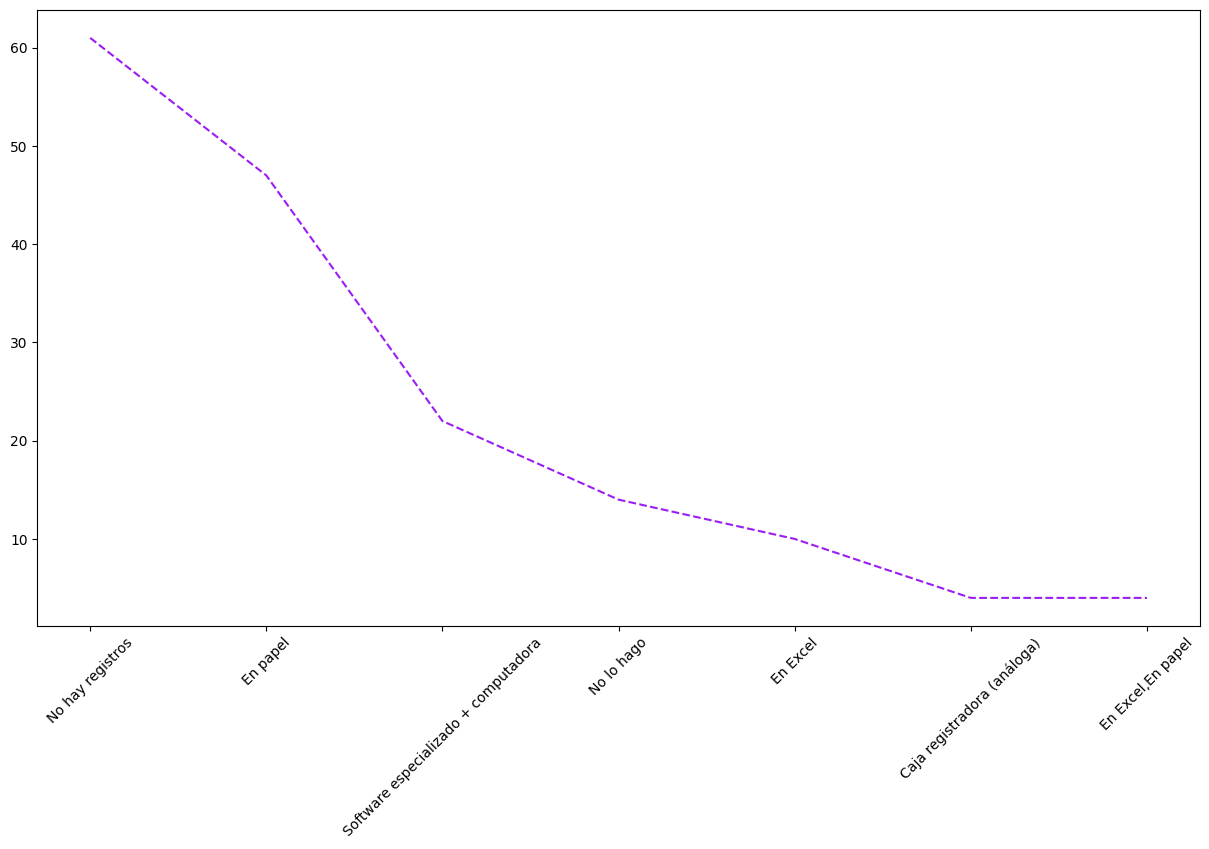

In [118]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)

plt.plot(Filtro.iloc[:,0],Filtro.iloc[:,1],label=Filtro.iloc[:,0], color='#9C1CF4', linestyle='dashed')

Se observa que los registros de ventas también es comunmente registrado en papel, sin embargo gran parte de los encuestados no toman registros de venta lo cual es algo interesante. 

In [126]:
table11= freq_tbl(df.iloc[:,10])
table11

,186_internet_connection,frequency,percentage,cumulative_perc
0,yes,76,0.444444,0.444444
1,No hay registros,63,0.368421,0.812865
2,no,32,0.187135,1.000000


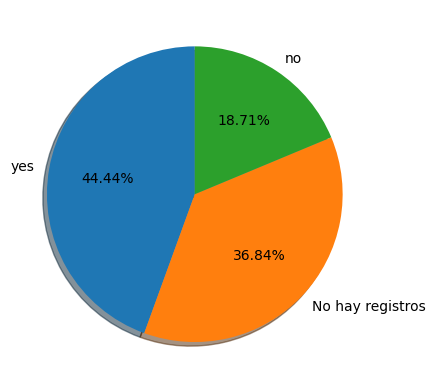

In [127]:
plt.pie(table11.iloc[:,1], labels=table11.iloc[:,0], startangle=90, shadow=True, autopct='%1.2f%%')
plt.show()

Se observa que el 44% de las tiendas en observación contaba con cnección a internet mientas que tan solo el 18.71% de las tiendas no contaba. 

In [128]:
table12= freq_tbl(df.iloc[:,11])
table12

,189_payment_methods,frequency,percentage,cumulative_perc
0,No hay registros,64,0.374269,0.374269
1,Efectivo,40,0.233918,0.608187
2,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
3,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
4,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.988304
6,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
7,Tarjeta de débito y/o crédito,1,0.005848,1.000000


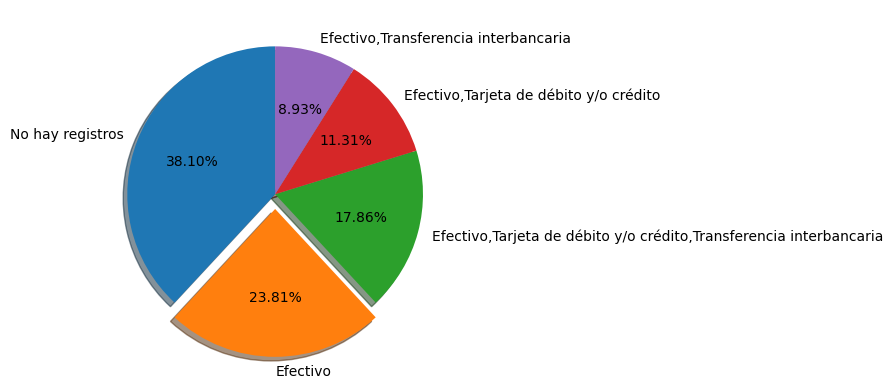

In [133]:
Filtro= table12[table12.iloc[:,1]>1]
plt.pie(Filtro.iloc[:,1], labels=Filtro.iloc[:,0], startangle=90, shadow=True, autopct='%1.2f%%',explode=(0,0.1,0,0,0))
plt.show()

Observamos que el 23.81% que es el mayor fragmento de las encuestas llenadas, tienen como única opción el pago en efectivo. 

In [134]:
table13= freq_tbl(df.iloc[:,12])
table13

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,No hay registros,76,0.444444,0.444444
1,Redes sociales,27,0.157895,0.602339
2,Aplicación móvil,21,0.122807,0.725146
3,Ninguna,20,0.116959,0.842105
4,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
5,Cuaderno,6,0.035088,0.953216
6,Teléfono,1,0.005848,0.959064
7,"Cuaderno,Redes sociales",1,0.005848,0.964912
8,"Aplicación móvil,De frente",1,0.005848,0.970760
9,Físico,1,0.005848,0.976608


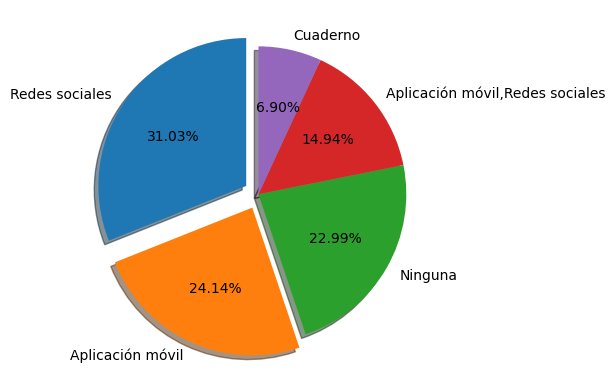

In [137]:
Filtro= table13[(table13.iloc[:,1]>1) & (table13.iloc[:,0]!='No hay registros')]
plt.pie(Filtro.iloc[:,1], labels=Filtro.iloc[:,0], startangle=90, shadow=True, autopct='%1.2f%%',explode=(0.1,0.1,0,0,0))
plt.show()

El 50% de las herramientas para relaciones con el cliente son por redes sociales y por aplicaciones móviles. 

  33_credit_to_customers  frequency  percentage  cumulative_perc
0                     no         80    0.467836         0.467836
2                    yes         27    0.157895         1.000000


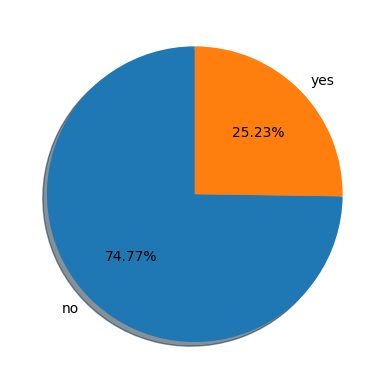

In [143]:
table14= freq_tbl(df.iloc[:,13])
Filtro= table14[table14.iloc[:,0]!='No hay registros']
print(Filtro)
plt.pie(Filtro.iloc[:,1], labels=Filtro.iloc[:,0], startangle=90, shadow=True, autopct='%1.2f%%')
plt.show()

Únicamente el 25% de las empresas en la encuesta tienen servicio de crédito con los clientes. 

**Pasamos ahora con los datos numéricos**

In [124]:
df.iloc[:,14].value_counts()

0     67
1     40
2     33
3     16
4      6
5      4
9      1
10     1
6      1
8      1
7      1
Name: 97_number_of_customers_in_store, dtype: int64

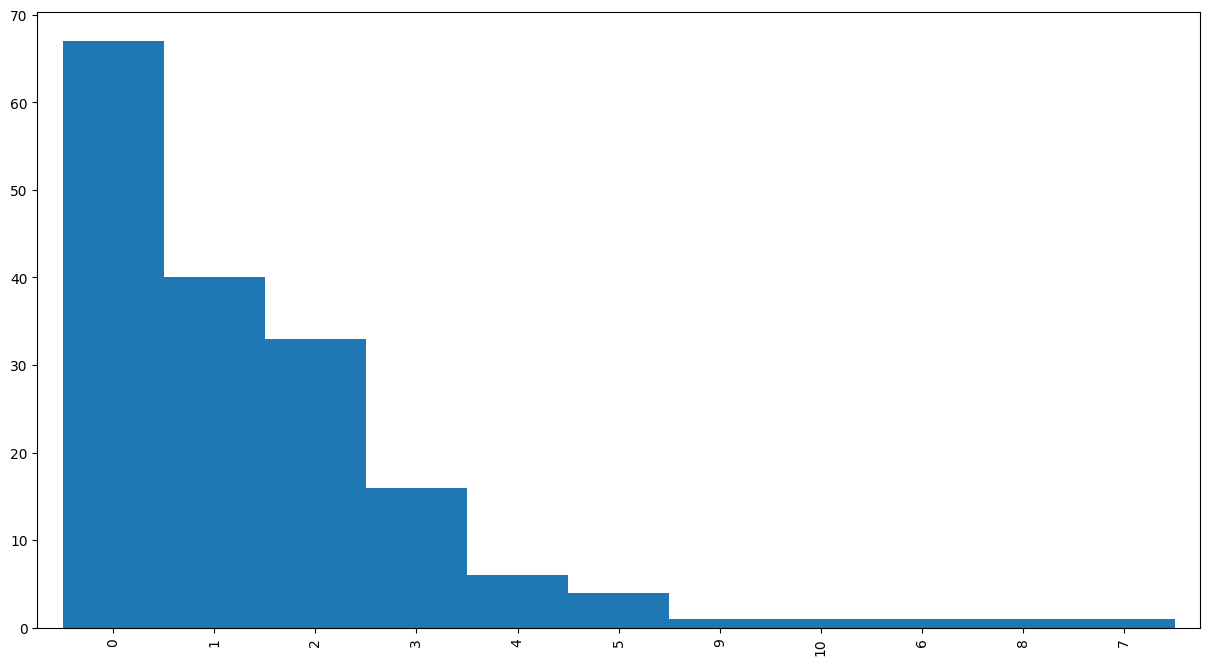

In [125]:
plt.xticks(rotation=90)
df.iloc[:,14].value_counts().plot(kind = 'bar', width=1, figsize=(15,8))
plt.show()

Se observa que de las encuestas llenadas, mayormente se tenían 0-2 clientes en la tienda en el moemnto llenada por lo cual entendemos que son tiendas chicas. 

In [159]:
df.iloc[:,15].value_counts()
Filtro= df.iloc[:,15][(df.iloc[:,15]!='No hay registros')&(df.iloc[:,15]<23)]
Filtro.value_counts()

0.0     80
1.0     29
2.0     25
3.0     16
5.0      7
4.0      4
6.0      4
7.0      1
8.0      1
9.0      1
18.0     1
11.0     1
Name: 268_number_fridges, dtype: int64

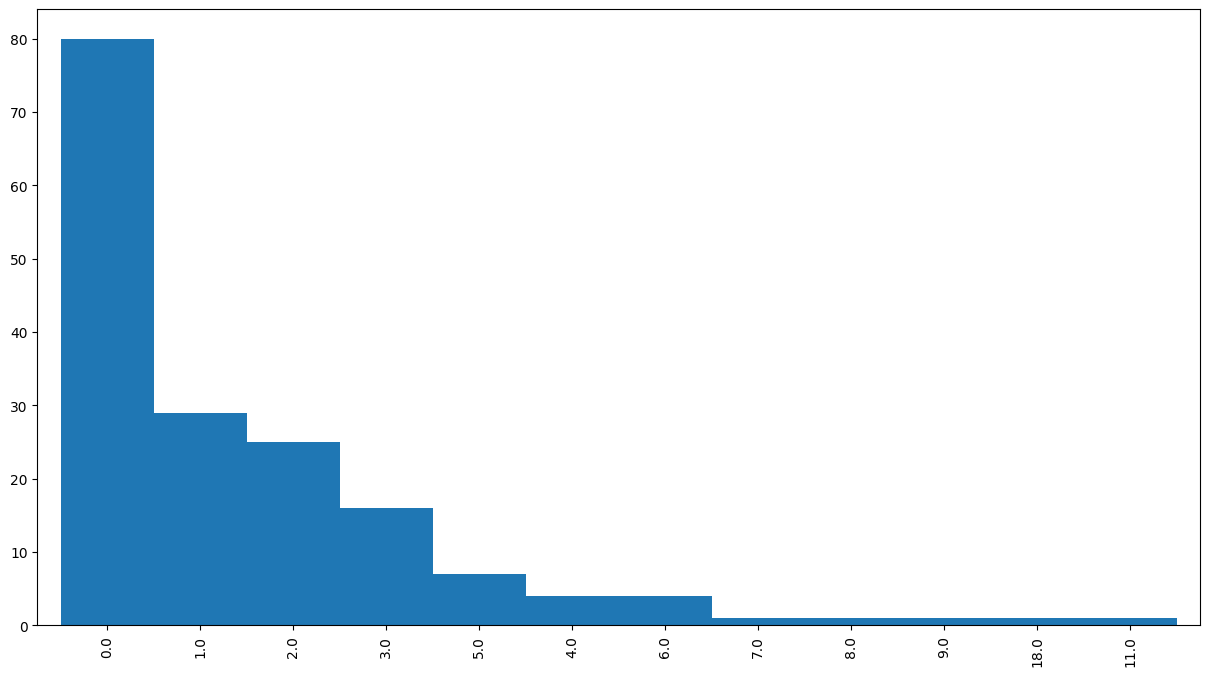

In [151]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)

Filtro.value_counts().plot(kind = 'bar', width=1, figsize=(15,8))
plt.show()

Se observa que la mayoría de las tiendas no tienen ningún refrigerador, o si a caso tiene 1 o 2. 

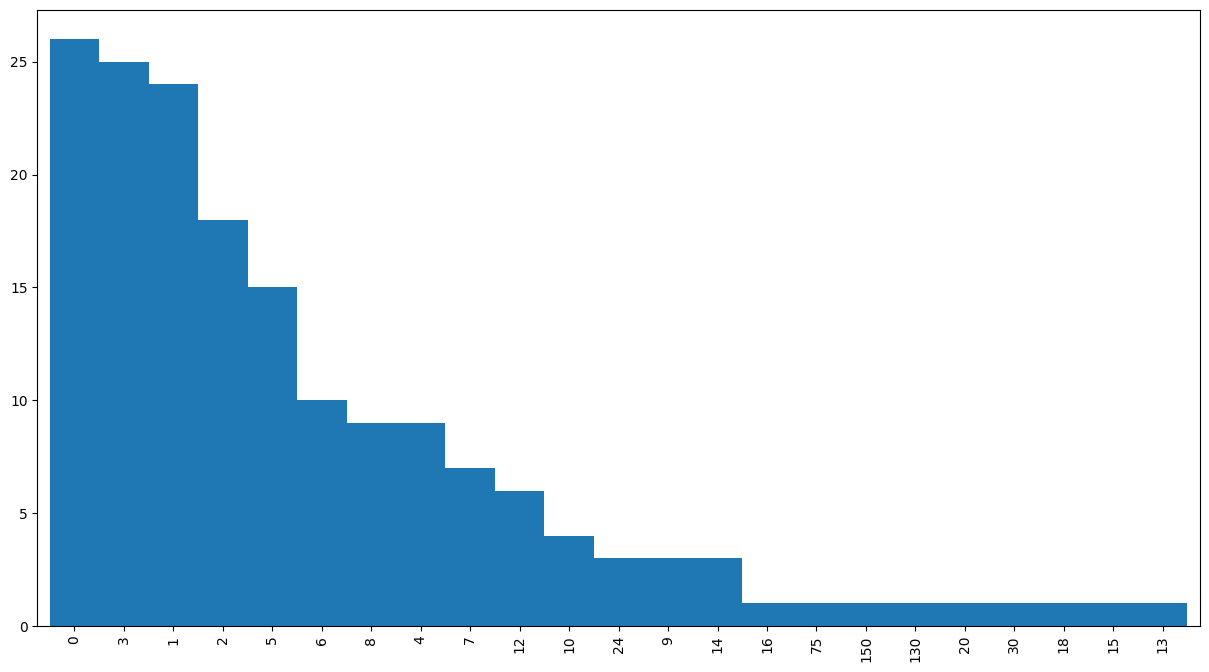

In [161]:
df.iloc[:,16].value_counts().plot(kind = 'bar', width=1, figsize=(15,8))
plt.show()

De los micro-retailers se obtiene que la mayoría de los datos tiene entre 0-5 repisas o estantes en la tienda. 

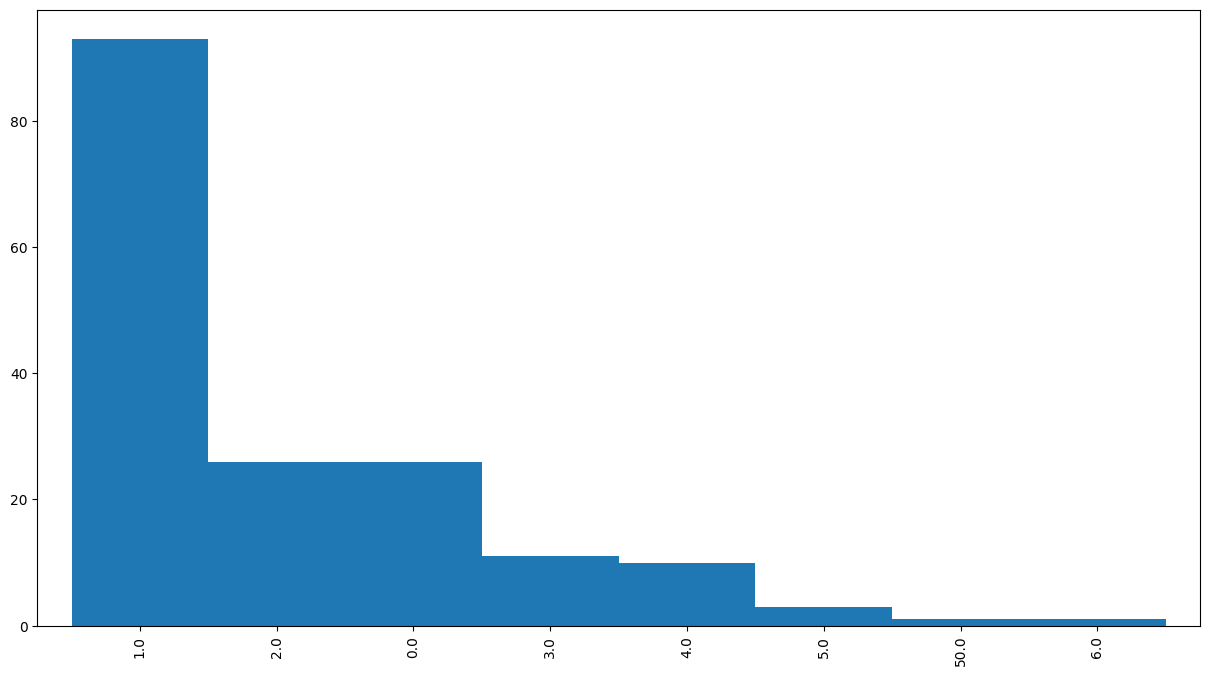

In [165]:
df.iloc[:,17].value_counts()
df.iloc[:,17].value_counts().plot(kind = 'bar', width=1, figsize=(15,8))
plt.show()

La mayoría de los negocios tiene únicamente un empleado. 

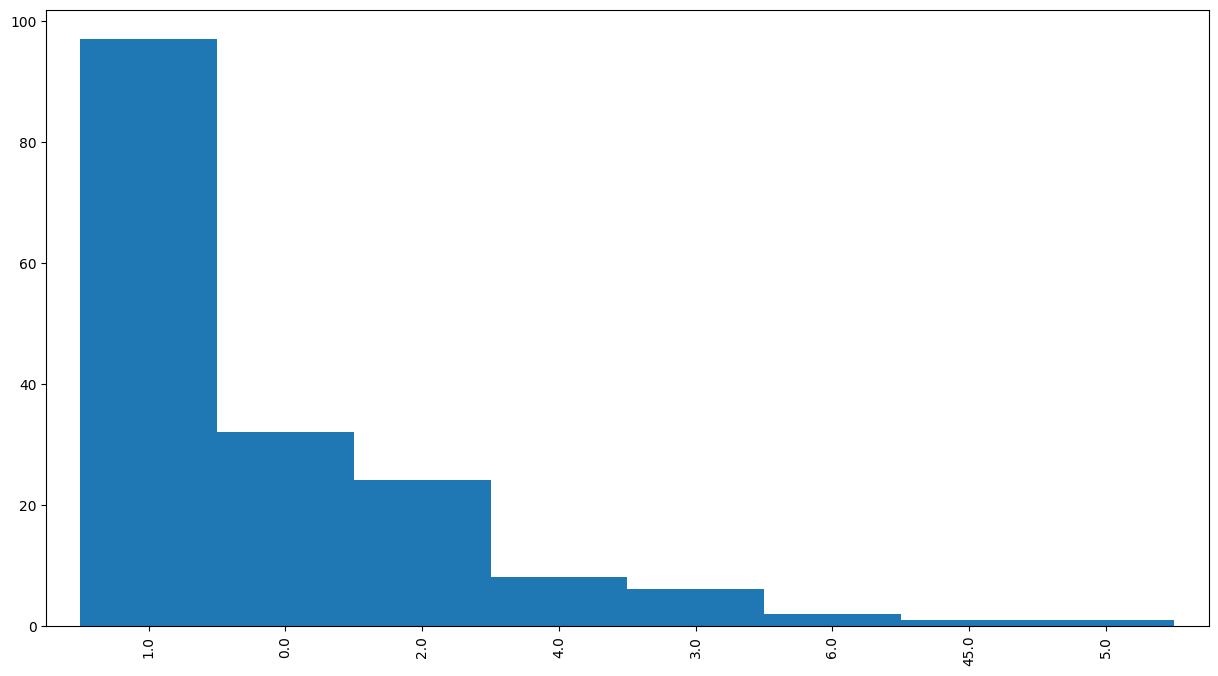

In [166]:
df.iloc[:,18].value_counts()
df.iloc[:,18].value_counts().plot(kind = 'bar', width=1, figsize=(15,8))
plt.show()

La gran mayoría tuvio únicamente un empleado permanente el año pasado. 

3.0     84
2.0     16
1.0     16
4.0     14
0.0     12
5.0      8
6.0      6
7.0      5
10.0     3
8.0      3
20.0     2
15.0     2
Name: 145_number_direct_competitors, dtype: int64


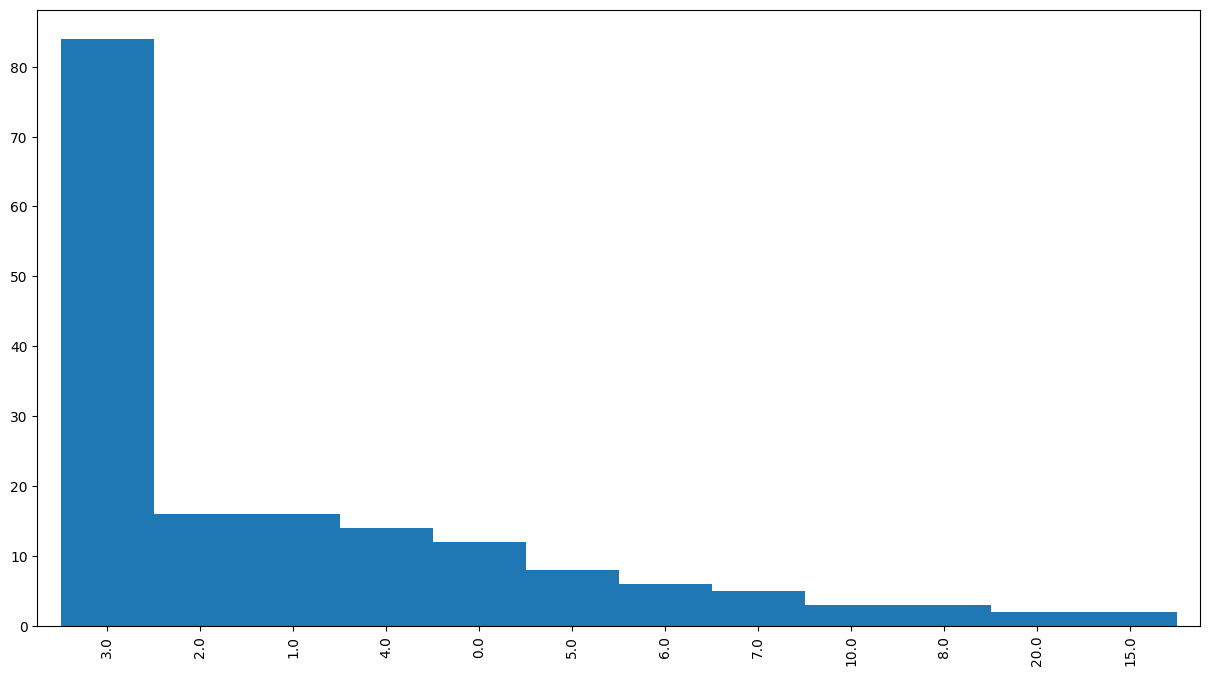

In [168]:
print(df.iloc[:,19].value_counts())
df.iloc[:,19].value_counts().plot(kind = 'bar', width=1, figsize=(15,8))
plt.show()

Los negocios de la encuesta tienen 3 competidores directos, hay algunos que consideran tener inclusive más de 10. 